In [1]:

import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from pandas.plotting import scatter_matrix
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.covariance import EllipticEnvelope
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
data = pd.read_csv('/content/fetal_health.csv')

In [3]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
print(f"Dataset Columns:\n{data.columns}")


Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [6]:
data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
print(f"The dataset size: {data.shape}")


The dataset size: (2126, 22)


Null Values


In [8]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


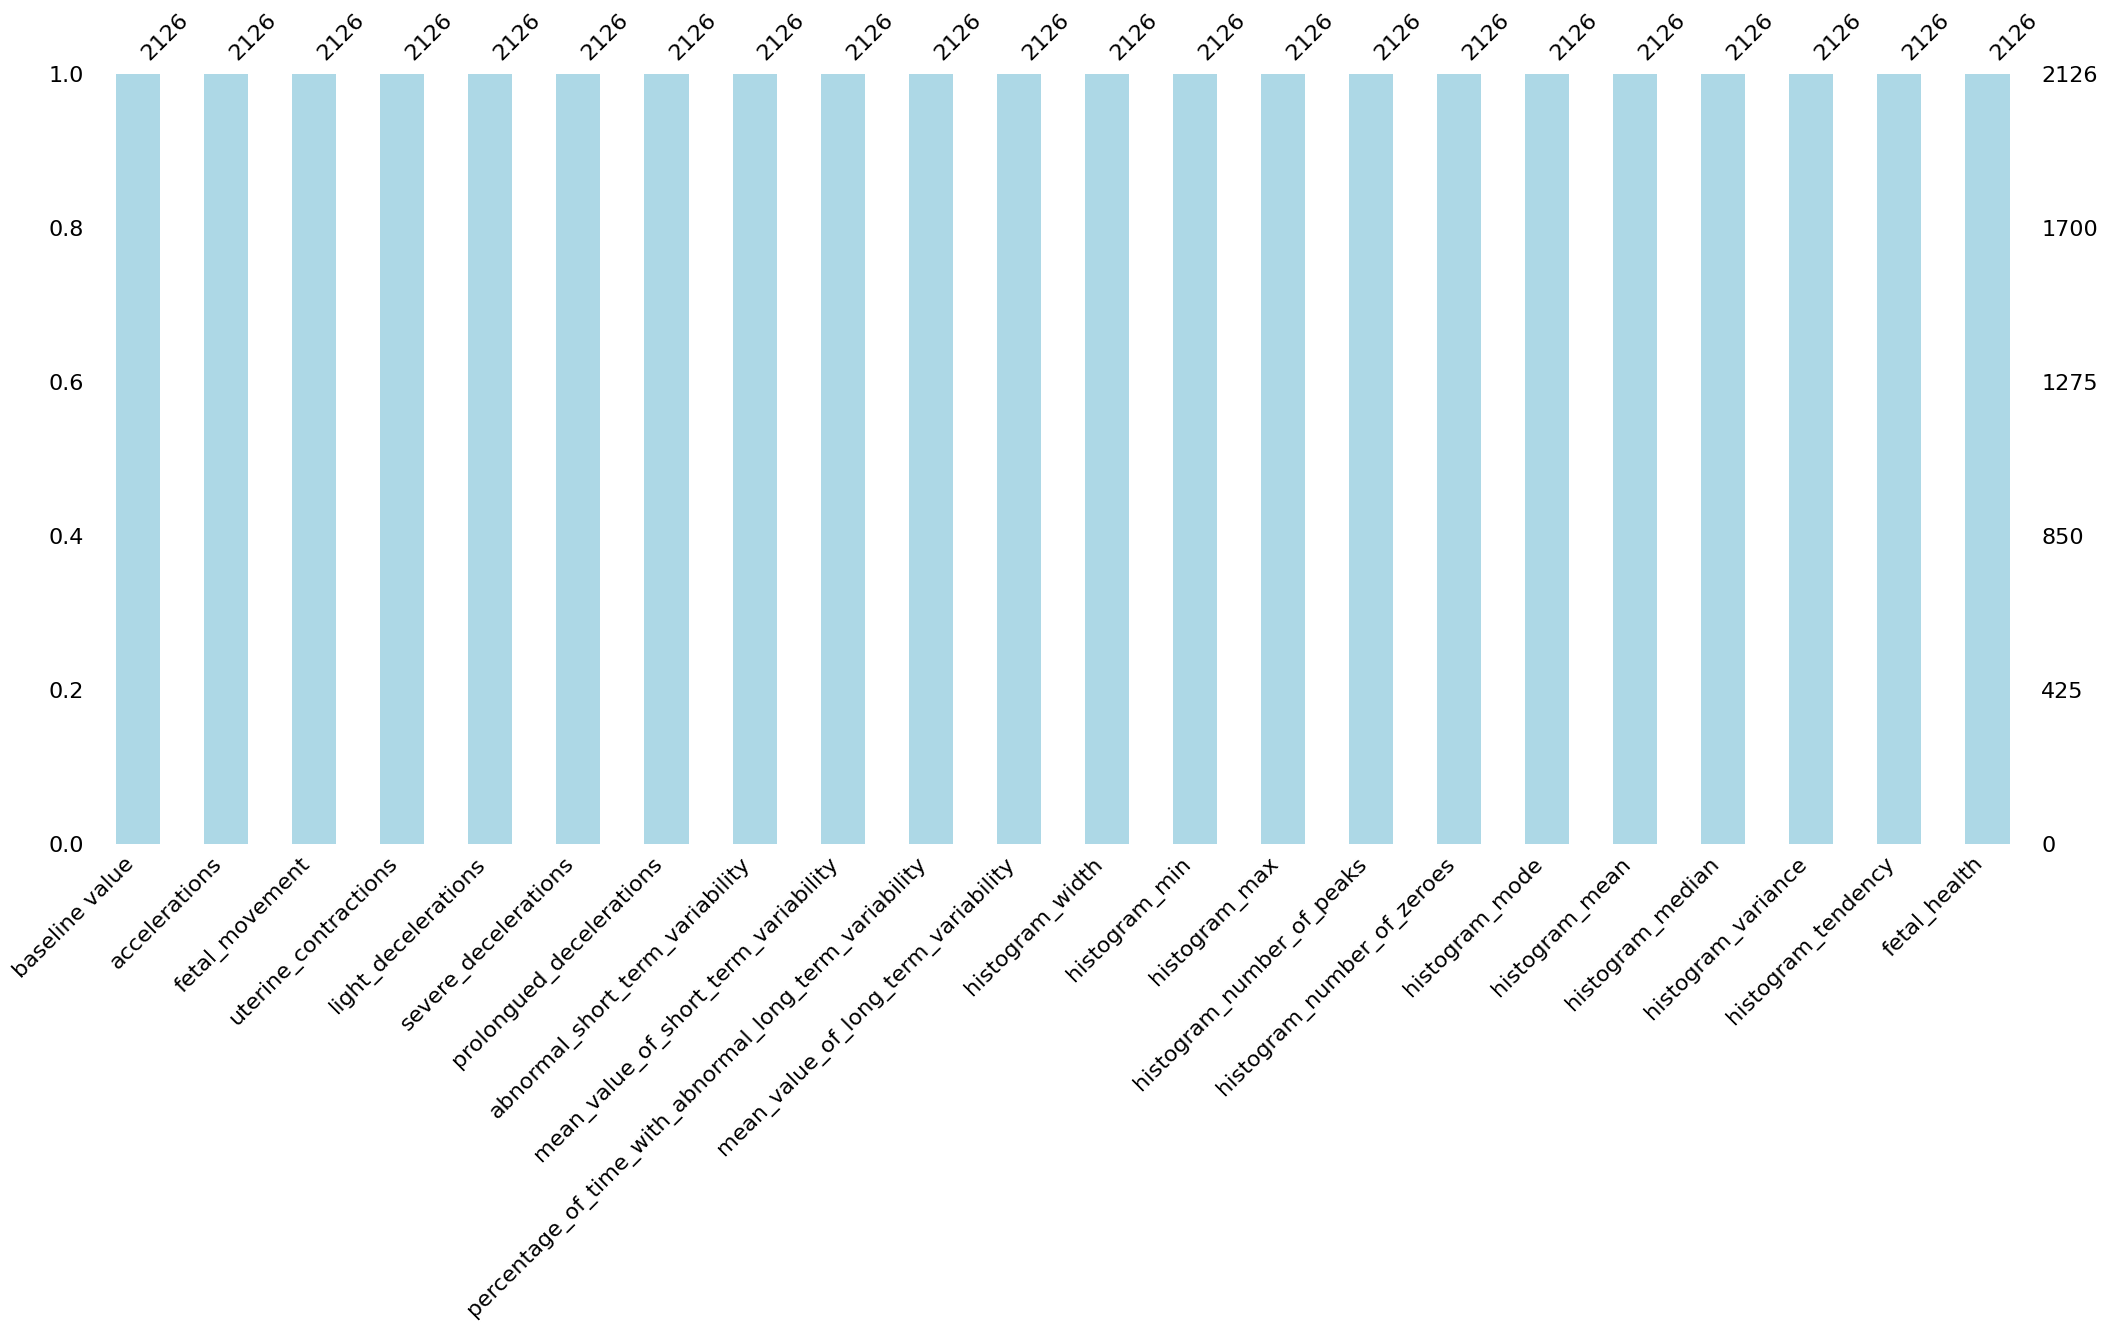

In [9]:
null_plot = msno.bar(data, color = "lightblue")

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


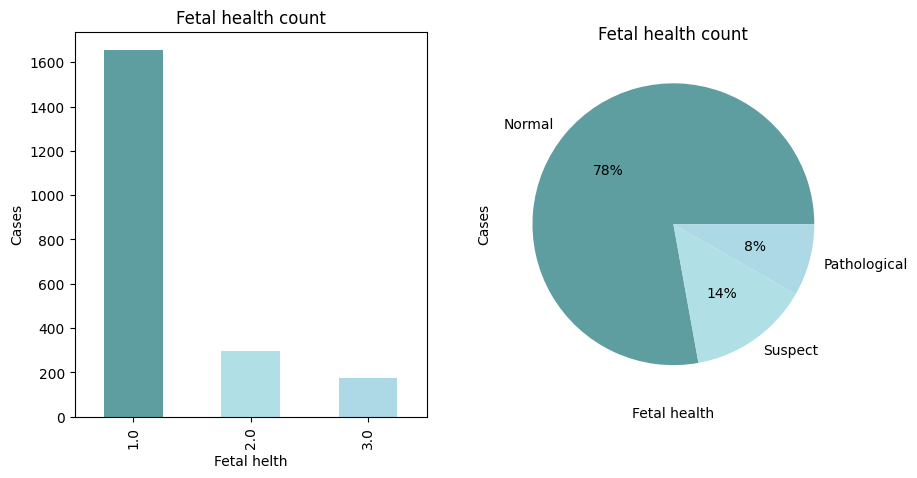

In [10]:
total = data["fetal_health"].count()  # Count the total number of instances in the column
value_counts = data["fetal_health"].value_counts()

normal = value_counts.get(1, 0)
suspect = value_counts.get(2, 0)
pathological = value_counts.get(3, 0)

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state")

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")


plt.show()


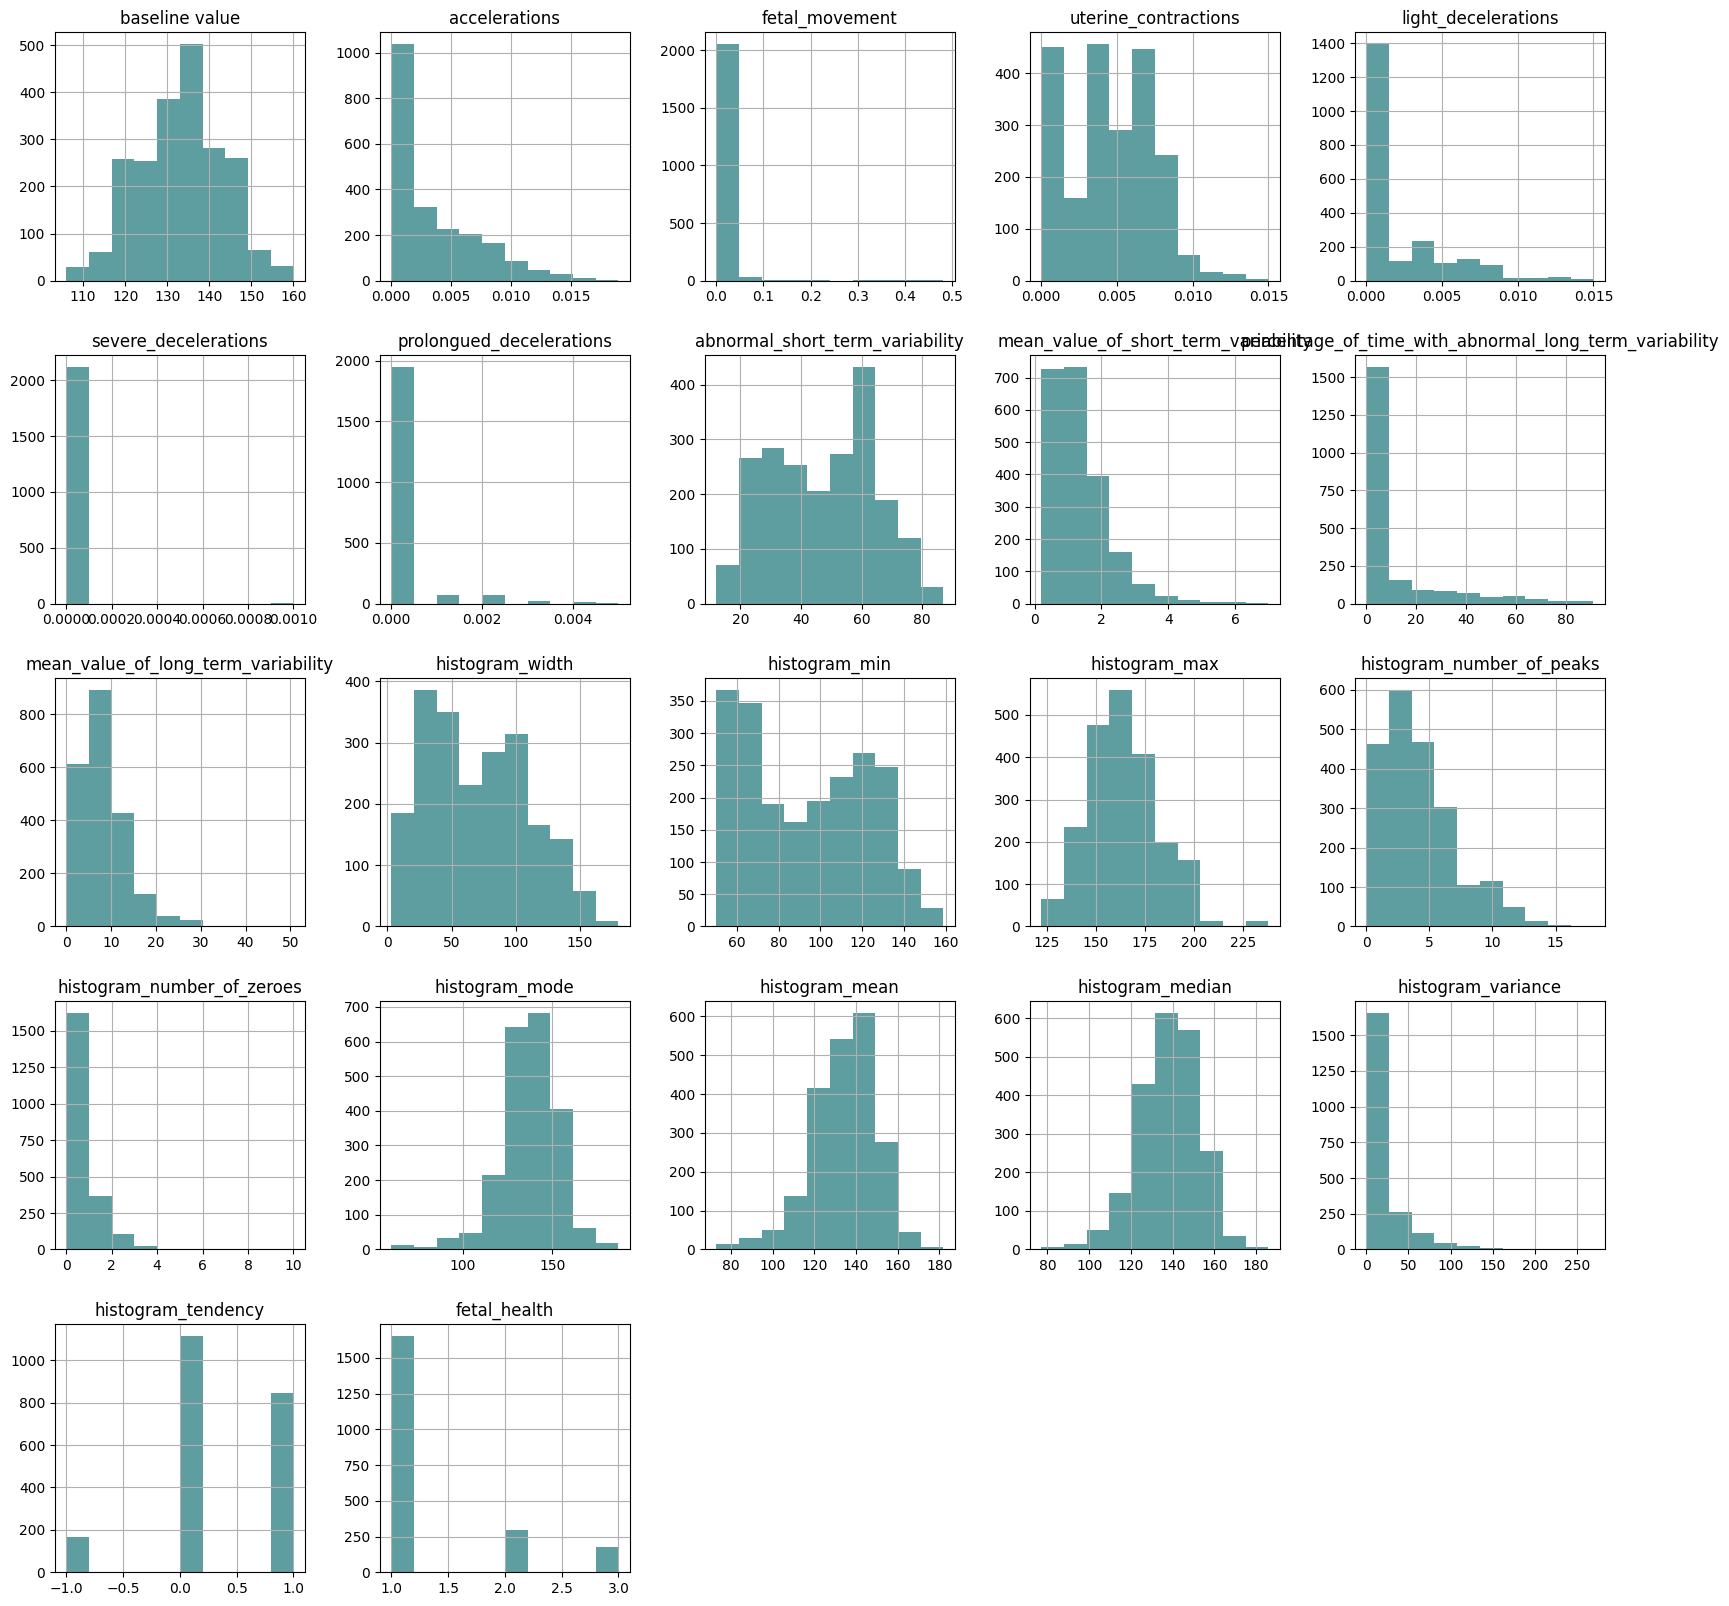

In [11]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

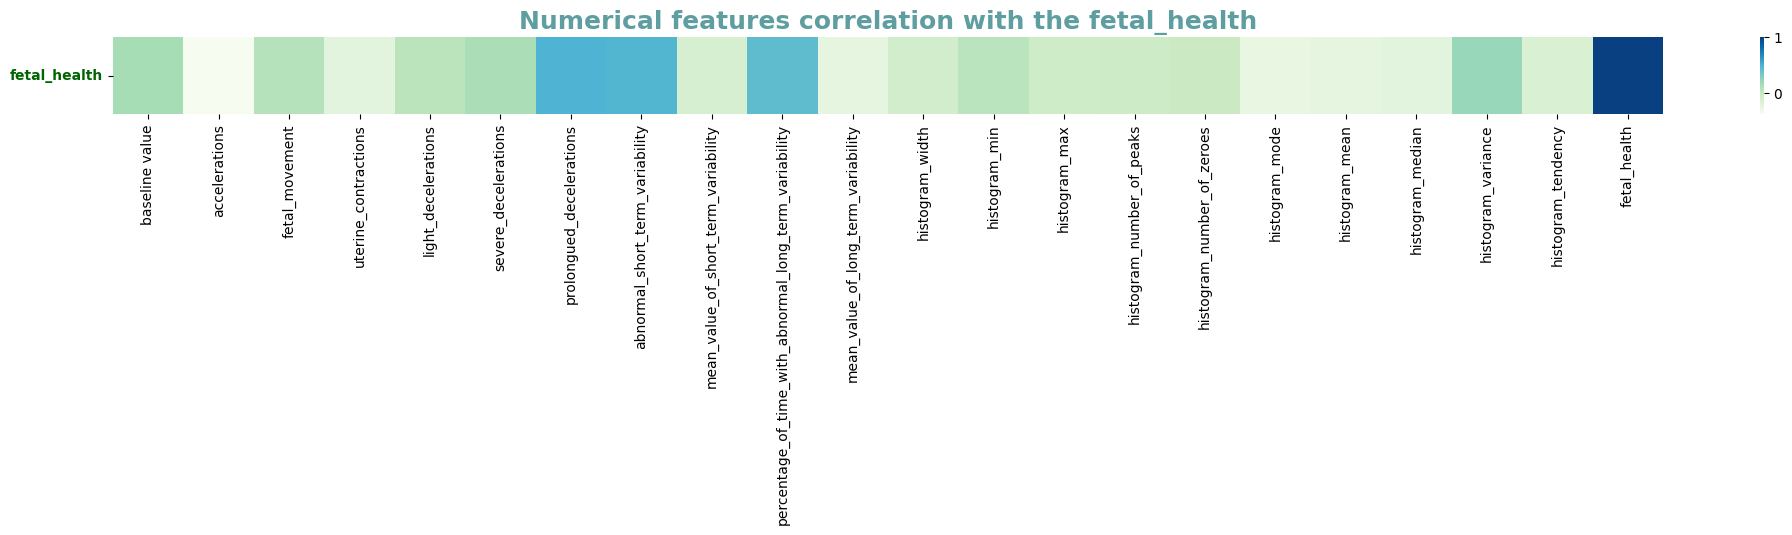

In [12]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [13]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


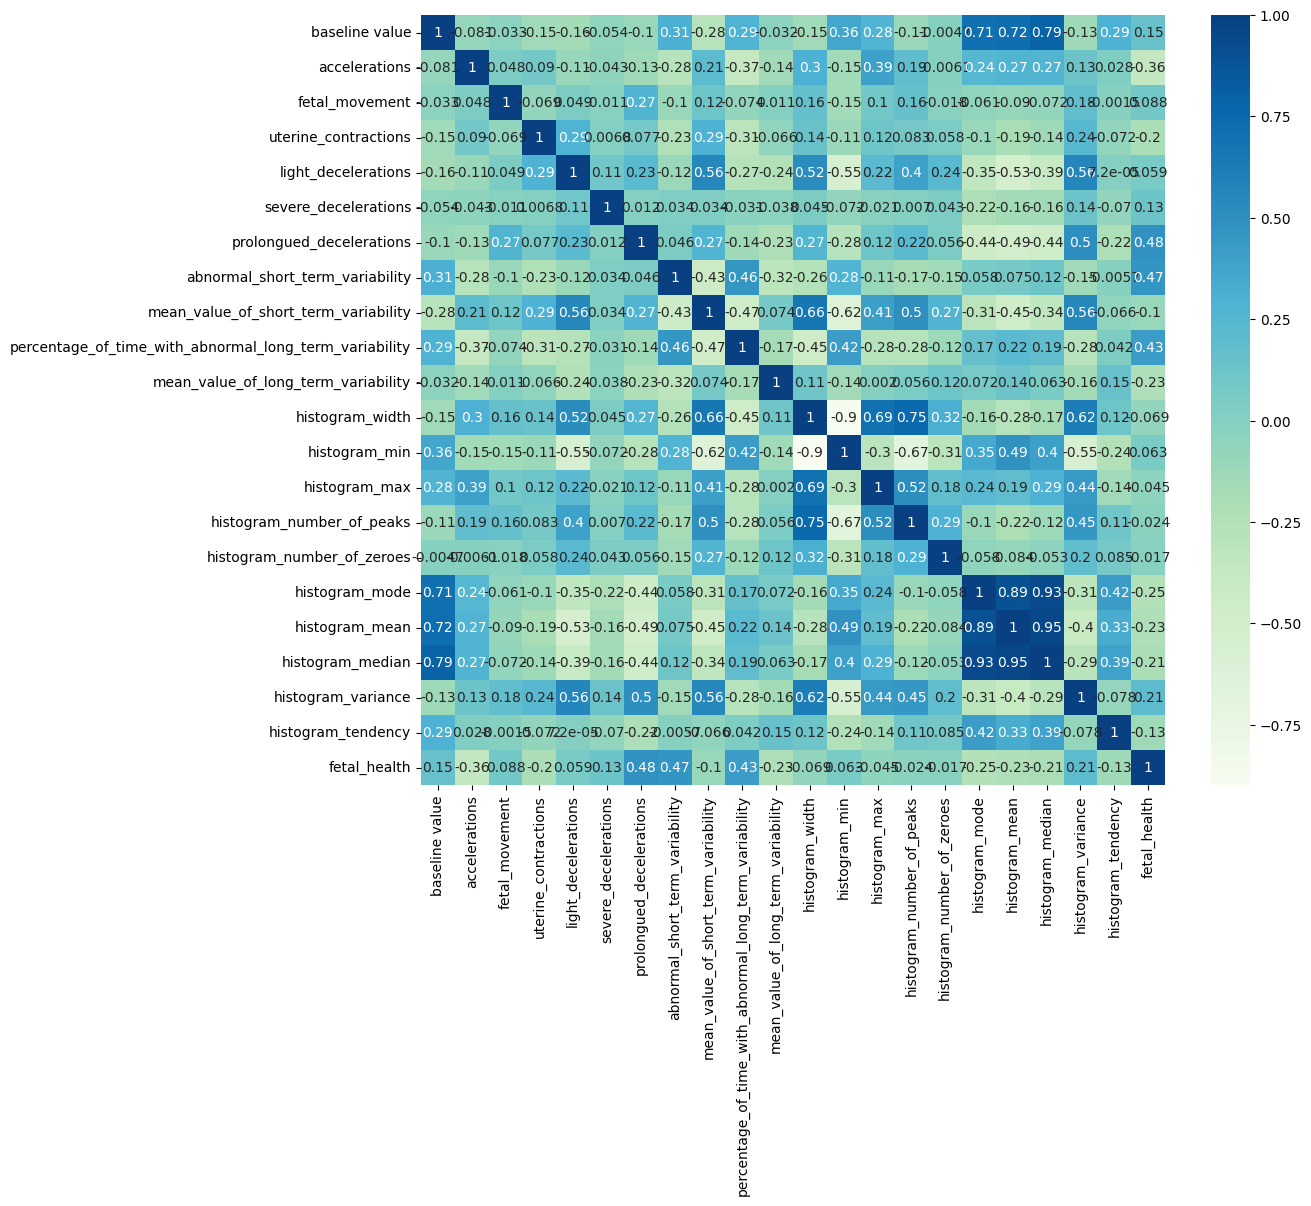

In [14]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")

Scaling Data

In [15]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [16]:
y = data["fetal_health"]
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


Split Train and Test

In [104]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_test.value_counts()

1.0    497
2.0     88
3.0     53
Name: fetal_health, dtype: int64



Building Machine Learning Models:


Logistic Regression

In [18]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


In [19]:
cv_method = StratifiedKFold(n_splits=3)

In [20]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.90927419 0.89717742 0.88306452]
CrossValMeans: 0.897
CrossValStandard Deviation: 0.011


In [21]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [22]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(),
                                param_grid=params_LR,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [23]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [24]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=10)


In [25]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


In [26]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 10)}")


Best score for LR model: 0.8985215054


In [27]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

lrscore=np.mean(y_test == pred_logistic_regression)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [28]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.138
Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on training set = 0.907
R^2(coefficient of determination) on testing set = 0.886


In [29]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



In [30]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


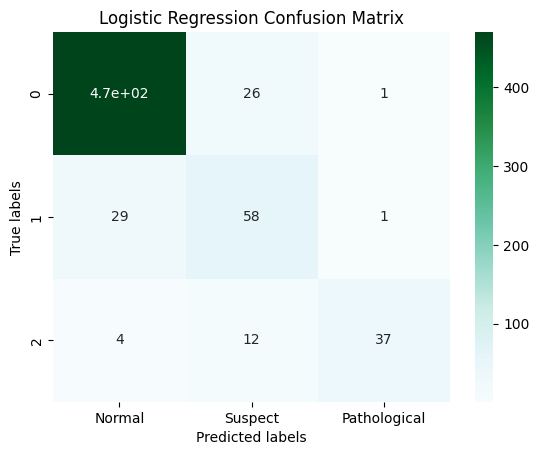

In [31]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Logistic Regression Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

KNN

In [32]:
# Baseline model of K-Nearest Neighbors with default parameters:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.876


In [33]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3)

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.90927419 0.89717742 0.89717742]
CrossValMeans: 0.901
CrossValStandard Deviation: 0.006


In [34]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

In [35]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=params_knn,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=-1,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [36]:
 # Fit model with train data
GridSearchCV_knn.fit(X_train, y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [37]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")

Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)


In [38]:
best_params_knn = GridSearchCV_knn.best_params_
print(f"Best parameter values:\n{best_params_knn}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


In [39]:
best_score_knn = GridSearchCV_knn.best_score_
print(f"Best score for knn model: {round(best_score_knn, 3)}")

Best score for knn model: 0.909


In [40]:
# Test with new parameter for KNN model
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

knnscore=np.mean(y_test == pred_knn)


In [41]:
print(f"Mean Square Error for K_Nearest Neighbor  = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Mean Square Error for K_Nearest Neighbor  = 0.13
Root Mean Square Error for K_Nearest Neighbor = 0.361
R^2(coefficient of determination) on training set = 0.956
R^2(coefficient of determination) on testing set = 0.898


In [42]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.66      0.67      0.67        88
         3.0       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.90       638



In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Confusion Matrix:
[[478  18   1]
 [ 25  59   4]
 [  5  12  36]]


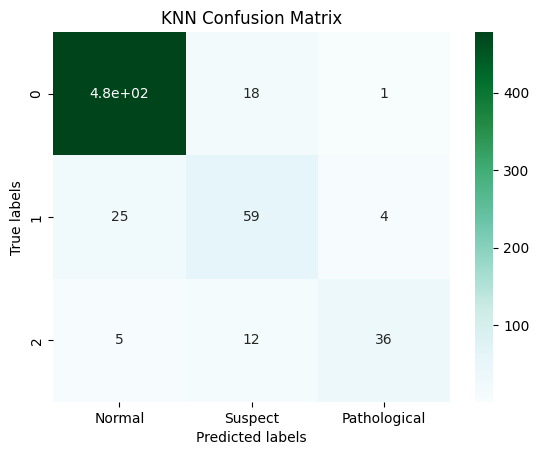

In [44]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("KNN Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Random Forest (RF)

In [45]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.933


In [46]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.94758065 0.93951613 0.93346774]
CrossValMeans: 0.94
CrossValStandard Deviation: 0.006


In [47]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]
              }

In [48]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=params_RF,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [49]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [50]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(n_estimators=200)


In [51]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.943


In [53]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

rfscore=np.mean(y_test == pred_random_forest)


mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [54]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.1
Root Mean Square Error for Random Forest = 0.317
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.928


In [55]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.80      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638



In [56]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[482  11   4]
 [ 21  64   3]
 [  2   5  46]]


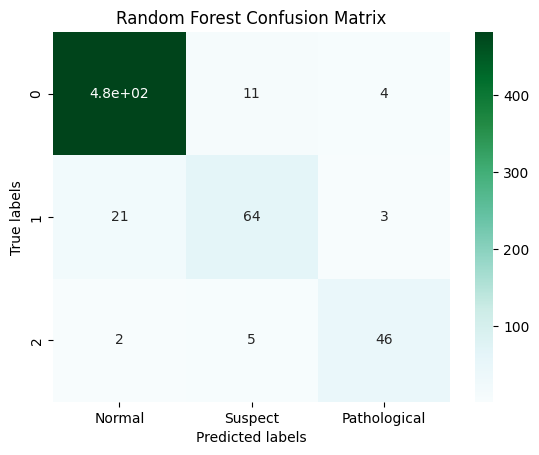

In [57]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Random Forest Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Gradient Boosting classifier (GBC)


In [58]:
# Baseline model of gradient boosting classifier with default parameters:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


In [59]:
# Cross validate Gradient Boosting Classifier model
scores_GBC = cross_val_score(gbc, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Gradient Boosting Classifier model:\n{scores_GBC}")
print(f"CrossValMeans: {round(scores_GBC.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_GBC.std(), 3)}")

Scores(Cross validate) for Gradient Boosting Classifier model:
[0.95967742 0.93548387 0.94354839]
CrossValMeans: 0.946
CrossValStandard Deviation: 0.01


In [60]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

In [61]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(),
                                param_grid=params_GBC,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring="accuracy",
                                return_train_score=True
                                )

In [62]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [63]:
# Get the best estimator values.
best_estimator_GBC = GridSearchCV_GBC.best_estimator_
print(f"Best estimator values for GBC model:\n{best_estimator_GBC}")

Best estimator values for GBC model:
GradientBoostingClassifier(loss='deviance', n_estimators=500)


In [64]:
# Get the best parameter values.
best_params_GBC = GridSearchCV_GBC.best_params_
print(f"Best parameter values for GBC model:\n{best_params_GBC}")

Best parameter values for GBC model:
{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}


In [65]:
# Best score for GBC by using the best_score attribute.
best_score_GBC = GridSearchCV_GBC.best_score_
print(f"Best score value for GBC model: {round(best_score_GBC, 3)}")

Best score value for GBC model: 0.951


In [66]:
# Test with new parameter for GBC model
gbc = GradientBoostingClassifier(criterion="friedman_mse", learning_rate=1, loss="deviance", max_depth=5, max_features="log2", min_samples_leaf=0.2, min_samples_split=0.5, n_estimators=200, random_state=42)
gbc_mod = gbc.fit(X_train, y_train)
pred_gbc = gbc_mod.predict(X_test)


gbcscore=np.mean(y_test == pred_gbc)


mse_gbc = mean_squared_error(y_test, pred_gbc)
rmse_gbc = np.sqrt(mean_squared_error(y_test, pred_gbc))
score_gbc_train = gbc_mod.score(X_train, y_train)
score_gbc_test = gbc_mod.score(X_test, y_test)

In [67]:
print(f"Mean Square Error for Gradient Boosting Classifier = {round(mse_gbc, 3)}")
print(f"Root Mean Square Error for Gradient Boosting Classifier = {round(rmse_gbc, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_gbc_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_gbc_test, 3)}")

Mean Square Error for Gradient Boosting Classifier = 0.149
Root Mean Square Error for Gradient Boosting Classifier = 0.386
R^2(coefficient of determination) on training set = 0.998
R^2(coefficient of determination) on testing set = 0.898


In [68]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       497
         2.0       0.69      0.69      0.69        88
         3.0       0.78      0.68      0.73        53

    accuracy                           0.90       638
   macro avg       0.80      0.78      0.79       638
weighted avg       0.90      0.90      0.90       638



In [69]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[476  15   6]
 [ 23  61   4]
 [  4  13  36]]


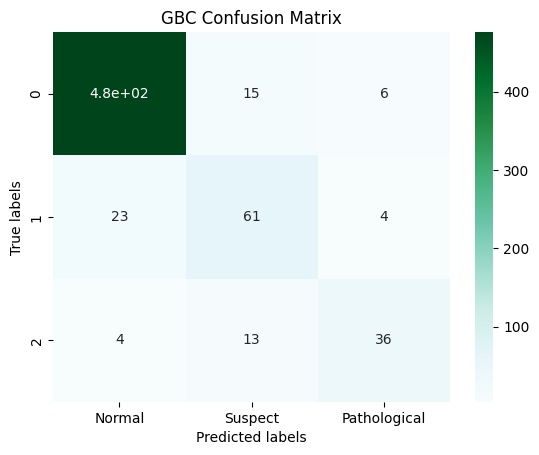

In [70]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("GBC Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

Plotting the learning curve


In [71]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

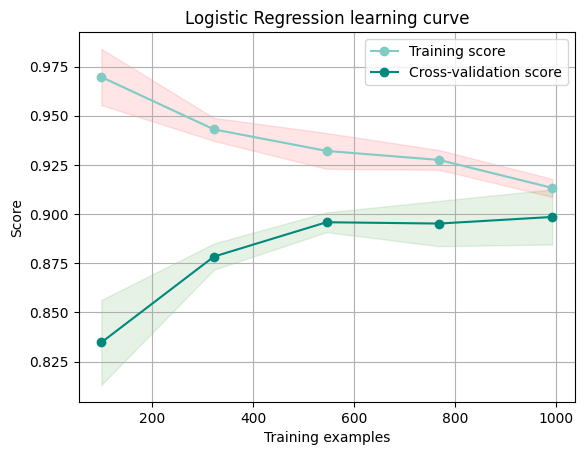

In [72]:
# Logistic Regression
plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistic Regression learning curve", x = X_train, y = y_train, cv = cv_method);

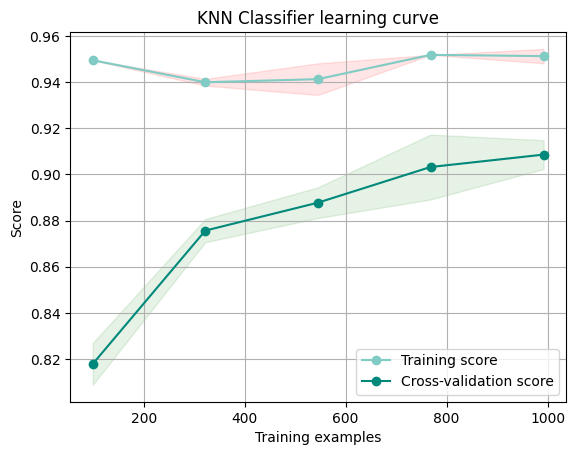

In [73]:
 # KNN
 plot_learning_curve(GridSearchCV_knn.best_estimator_,title = "KNN Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

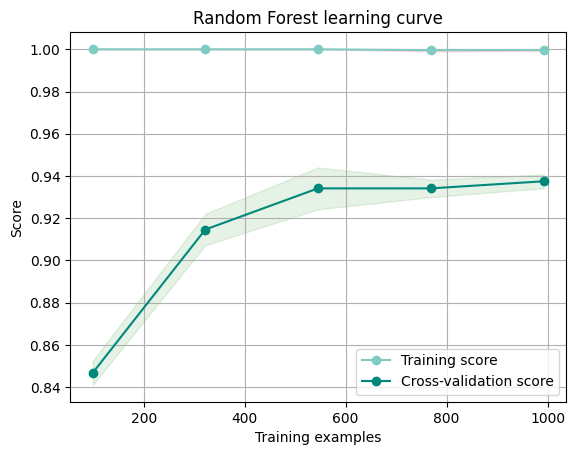

In [74]:
# Random forest
plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train, y = y_train, cv = cv_method);

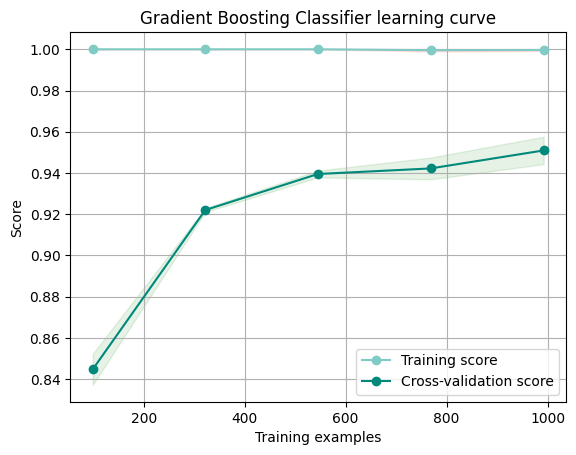

In [75]:
# Gradient Boosting Classifier
plot_learning_curve(GridSearchCV_GBC.best_estimator_,title = "Gradient Boosting Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

Combining Models

In [ ]:
# Define individual models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)  # SVC needs probability=True for soft voting

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')

In [ ]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

combscore=np.mean(y_test == y_pred)

print("LR + DT Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("LR + DT Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

In [105]:
# Define individual models
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = SVC(probability=True)  # SVC needs probability=True for soft voting

# Create an ensemble of models
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('dt', model2), ('svc', model3)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)

print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.932601880877743


In [106]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

combscore2=np.mean(y_test == y_pred)


print("RF + GBC Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

RF + GBC Confusion Matrix:
[[486   8   3]
 [ 24  61   3]
 [  2   3  48]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       497
         2.0       0.85      0.69      0.76        88
         3.0       0.89      0.91      0.90        53

    accuracy                           0.93       638
   macro avg       0.90      0.86      0.87       638
weighted avg       0.93      0.93      0.93       638



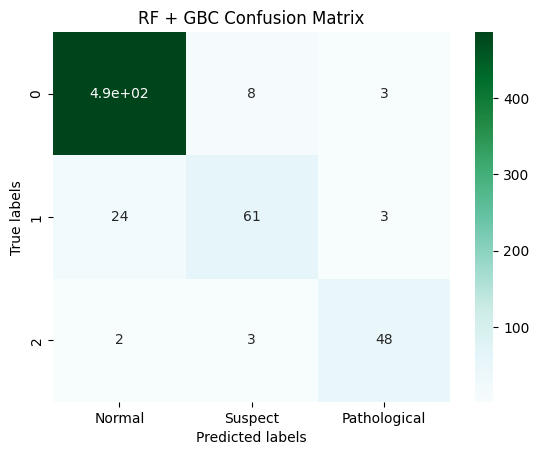

In [107]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("RF + GBC Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

AUC Score: 0.9815864001716368


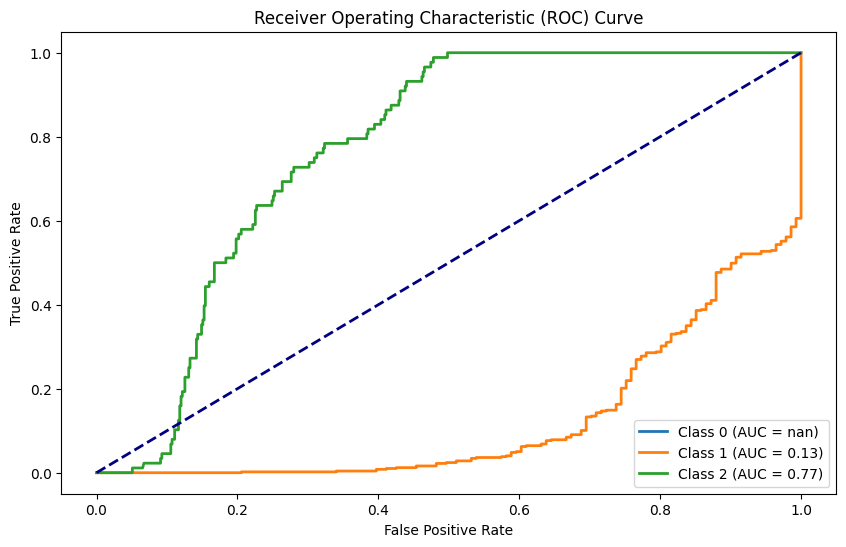

In [108]:
y_probs = ensemble_model.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_probs, multi_class='ovr')  # Change 'ovr' to 'ovo' if needed for your multiclass problem

print(f'AUC Score: {auc_score}')

# Plot ROC curve for each class in multiclass classification
plt.figure(figsize=(10, 6))
for i in range(y_probs.shape[1]):
    fpr, tpr, _ = roc_curve(y_test == i, y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Anomaly Detection Algo

In [ ]:
y_test2=y_test
y_test2[y_test2 != 1] = 3

One-Class SVM

In [ ]:
 #Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a one-class SVM model
model = OneClassSVM(nu=0.05)  # Adjust nu parameter based on your dataset

# Train the model on the healthy class (class 1)
model.fit(X_train_scaled[y_train == 1])

# Predict on the entire test set
y_pred = model.predict(X_test_scaled)

# Convert predictions to match original labels (1 for inliers, -1 for outliers)
y_pred[y_pred == 1] = 1  # Inliers (healthy)
y_pred[y_pred == -1] = 3  # Outliers (anomalies)

# Evaluate the model
conf_matrix = confusion_matrix(y_test2, y_pred)
classification_rep = classification_report(y_test2, y_pred)

ocsscore=np.mean(y_test2 == y_pred)

print("One Class SVM Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
print(f"One Class SVM: {round(ocsscore, 3)}")

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("One Class SVM Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Pathological"]);

Isolation Forest

In [ ]:
# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination based on your dataset

# Train the model on the healthy class (class 1)
model.fit(X_train[y_train == 1])

# Predict on the entire test set
y_pred = model.predict(X_test)

# Convert predictions to match original labels (1 for inliers, -1 for outliers)
y_pred[y_pred == 1] = 1  # Inliers (healthy)
y_pred[y_pred == -1] = 3  # Outliers (anomalies)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
isfscore=np.mean(y_test == y_pred)

print("Isolation Forest Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
print(f"Isolation Forest: {round(isfscore, 3)}")

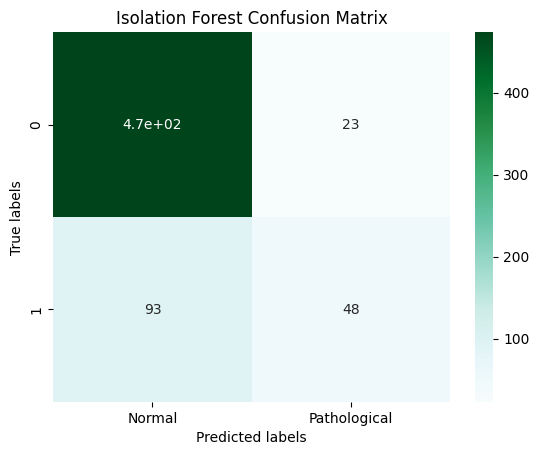

In [89]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Isolation Forest Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Pathological"]);

Local Outlier Factor

In [90]:
# Create a Local Outlier Factor model
model = LocalOutlierFactor(contamination=0.05)

# Fit the model on the training data (exclude anomalies)
model.fit_predict(X_train[y_train == 1])
lof=model
# Predict on the entire test set
y_pred = model.fit_predict(X_test)

# Convert predictions to match original labels (1 for inliers, -1 for outliers)
y_pred[y_pred == 1] = 1  # Inliers (healthy)
y_pred[y_pred == -1] = 3  # Outliers (anomalies)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
lofscore=np.mean(y_test == y_pred)

print("Local Outlier Factor Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Local Outlier Factor Confusion Matrix:
[[477  20]
 [129  12]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.79      0.96      0.86       497
         3.0       0.38      0.09      0.14       141

    accuracy                           0.77       638
   macro avg       0.58      0.52      0.50       638
weighted avg       0.70      0.77      0.70       638



In [91]:
print(f"Local Outlier Factor: {round(lofscore, 3)}")

Local Outlier Factor: 0.766


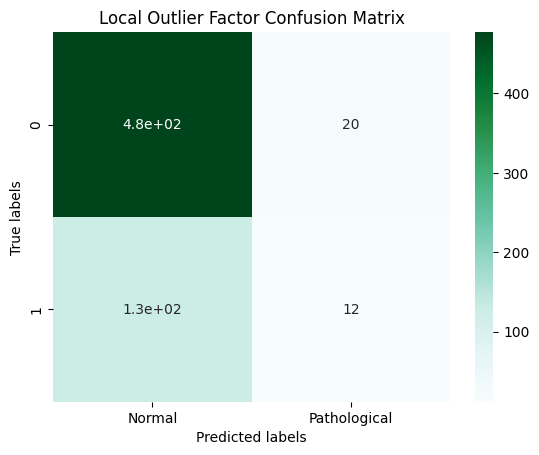

In [92]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Local Outlier Factor Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Pathological"]);

Autoencoder

In [100]:
# Build an autoencoder model
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder on normal instances
autoencoder.fit(X_train[y_train == 1], X_train[y_train == 1], epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Predict on the entire test set and calculate reconstruction error
reconstruction_errors = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)

# Set a threshold for anomaly detection based on reconstruction error
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile based on your data

# Classify instances as normal or anomaly based on the threshold
y_pred = np.where(reconstruction_errors > threshold, 3, 1)  # 3 for anomalies, 1 for normal

# Convert predictions to match original labels (1 for inliers, -1 for outliers)
y_pred[y_pred == 1] = 1  # Inliers (healthy)
y_pred[y_pred == -1] = 3  # Outliers (anomalies)


aescore=np.mean(y_test == y_pred)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Autoencoder Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Epoch 1/50
29/29 [==============================] - 1s 9ms/step - loss: 0.9784 - val_loss: 0.8606
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.8320 - val_loss: 0.7318
Epoch 3/50
29/29 [==============================] - 0s 3ms/step - loss: 0.7174 - val_loss: 0.6376
Epoch 4/50
29/29 [==============================] - 0s 3ms/step - loss: 0.6407 - val_loss: 0.5786
Epoch 5/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5945 - val_loss: 0.5419
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5653 - val_loss: 0.5179
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5454 - val_loss: 0.5002
Epoch 8/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5305 - val_loss: 0.4867
Epoch 9/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5188 - val_loss: 0.4754
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.5092 - val_loss: 0.4663
Epoch 11/50
29/29 [

In [ ]:
print(f"Autoencoder: {round(aescore, 3)}")

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Autoencoder Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Pathological"]);

Elliptic Envelope:

In [101]:
# Create an Elliptic Envelope model
model = EllipticEnvelope(contamination=0.05)

# Fit the model on the normal instances
model.fit(X_train[y_train == 1])
ee = model
# Predict on the entire test set
y_pred = model.predict(X_test)

# Convert predictions to match original labels (1 for inliers, -1 for outliers)
y_pred[y_pred == 1] = 1  # Inliers (normal)
y_pred[y_pred == -1] = 3  # Outliers (anomalies)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

eescore=np.mean(y_test == y_pred)

print("Elliptical Envelope Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Elliptical Envelope Confusion Matrix:
[[474  23]
 [116  25]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.95      0.87       497
         3.0       0.52      0.18      0.26       141

    accuracy                           0.78       638
   macro avg       0.66      0.57      0.57       638
weighted avg       0.74      0.78      0.74       638



In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels");
ax.set_title("Elliptical Envelope Confusion Matrix");
ax.xaxis.set_ticklabels(["Normal", "Pathological"]);

**Model Selection**

In [102]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "KNN",
                                  "Random Forest",
                                  "Gradient Boosting Classifier",
                                  "One Class SVM",
                                  "Isolation Forest",
                                  "Local Outlier Factor",
                                  "Autoencoder",
                                  "Elliptic Envelope",
                                  "LR + DTree Model",
                                  "RF + GBC"
                                  ],
                        "Score": [lrscore,
                                  knnscore,
                                  rfscore,
                                  gbcscore,
                                  ocsscore,
                                  isfscore,
                                  lofscore,
                                  aescore,
                                  eescore,
                                  combscore,
                                  combscore2
                                    ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(15)

,Model
Score,
0.932602,RF + GBC
0.927900,Random Forest
0.912226,LR + DTree Model
0.898119,KNN
0.898119,Gradient Boosting Classifier
0.885580,Logistic Regression
0.840125,One Class SVM
0.818182,Isolation Forest
0.794671,Autoencoder
